# Imports

In [1]:
import os
import re
from natsort import natsorted
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

from py_wake.site._site import UniformSite
from py_wake.site.shear import PowerShear
from py_wake.flow_map import Points

from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular

from py_wake.wind_farm_models import PropagateDownwind
from py_wake.deficit_models import BastankhahGaussianDeficit
from py_wake.superposition_models import LinearSum

# Turbines and site

In [2]:
po = [0, 0, 0, 0, 0, 0, 0, 49, 97, 183, 268, 369, 470, 580, 722, 
      900, 1103, 1315, 1526, 1705, 1883, 1940, 1980, 1995, 2000, 
      2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 
      2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000] # https://www.thewindpower.net/turbine_en_779_vestas_v100-2000.php
ct = 0.8 * np.ones_like(po)
u = np.linspace(0, len(po), len(po))

turbine = WindTurbine(name = 'Turbines',
                      diameter = 100,
                      hub_height = 100,
                      powerCtFunction = PowerCtTabular(u, po, 'kW', ct))

site = UniformSite(shear=PowerShear(h_ref=turbine.hub_height(), alpha=.1))

n_rows = 1 + 12
n_cols = 1 + 12

D = turbine.diameter()
s = 10 * D

x_grid, y_grid = np.meshgrid(np.arange(n_cols) * s,
                             np.arange(n_rows) * s)

x = x_grid.ravel()
y = y_grid.ravel()

theta_deg = 45
theta_rad = -np.radians(theta_deg)

rotation_matrix = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad)],
    [np.sin(theta_rad),  np.cos(theta_rad)]
])

xy_rotated = rotation_matrix @ np.vstack([x, y])
x, y = xy_rotated[0], xy_rotated[1]

x = x - np.max(x) # Set x=0 at downstream edge
y = y - np.min(y) # Set y=0 at bottommost turbine

padding = 30 # Padding for display [D]
'''
fig, ax = plt.subplots()

# Plot each turbine as a circle with diameter = 1 (in units of D)
for x_t, y_t in zip(x, y):
    circle = Circle((x_t/D, y_t/D), 2, color='black', fill=False)
    ax.add_patch(circle)

# Set padded limits
ax.set_xlim(min(x)/D - padding, max(x)/D + 5*padding)
ax.set_ylim(min(y)/D - padding, max(y)/D + padding)

# Now retrieve actual limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

tick_interval = 40  # in units of D

# Generate a wide range of ticks
xticks = np.arange(-1000, 1000, tick_interval)
yticks = np.arange(-1000, 1000, tick_interval)

# Clip to axes limits
xticks = xticks[(xticks >= xlim[0]) & (xticks <= xlim[1])]
yticks = yticks[(yticks >= ylim[0]) & (yticks <= ylim[1])]

# Apply ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xlabel(r"$x\;[D]$")
ax.set_ylabel(r"$y\;[D]$")
ax.set_aspect('equal')
ax.grid(True)
plt.show()'''

<>:72: SyntaxWarning: invalid escape sequence '\;'
<>:72: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Marcin\AppData\Local\Temp\ipykernel_8364\2345029676.py:72: SyntaxWarning: invalid escape sequence '\;'
  ax.set_xlabel(r"$x\;[D]$")


'\nfig, ax = plt.subplots()\n\n# Plot each turbine as a circle with diameter = 1 (in units of D)\nfor x_t, y_t in zip(x, y):\n    circle = Circle((x_t/D, y_t/D), 2, color=\'black\', fill=False)\n    ax.add_patch(circle)\n\n# Set padded limits\nax.set_xlim(min(x)/D - padding, max(x)/D + 5*padding)\nax.set_ylim(min(y)/D - padding, max(y)/D + padding)\n\n# Now retrieve actual limits\nxlim = ax.get_xlim()\nylim = ax.get_ylim()\n\ntick_interval = 40  # in units of D\n\n# Generate a wide range of ticks\nxticks = np.arange(-1000, 1000, tick_interval)\nyticks = np.arange(-1000, 1000, tick_interval)\n\n# Clip to axes limits\nxticks = xticks[(xticks >= xlim[0]) & (xticks <= xlim[1])]\nyticks = yticks[(yticks >= ylim[0]) & (yticks <= ylim[1])]\n\n# Apply ticks\nax.set_xticks(xticks)\nax.set_yticks(yticks)\n\nax.set_xlabel(r"$x\\;[D]$")\nax.set_ylabel(r"$y\\;[D]$")\nax.set_aspect(\'equal\')\nax.grid(True)\nplt.show()'

# Flow map

In [3]:
# Run your simulation
wdir = 270  # [deg]
wsp = 10  # [m/s]
ti = 0.1

mpl.rcParams.update(mpl.rcParamsDefault)
#fig, ax = plt.subplots(figsize=(10, 6))

wfm = PropagateDownwind(site, turbine,
                        wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True),
                        superpositionModel=LinearSum())
sim = wfm(x, y, ws=wsp, wd=wdir, TI=ti) # Skal gange størrelsen op med 10, da PyWake internt skalerer...?

'''
sim.flow_map().plot_wake_map(ax=ax, normalize_with=wsp, plot_windturbines=True)

for x_t, y_t in zip(x, y):
    circle = Circle((x_t/D, y_t/D), radius=2, color='black', fill=False)
    ax.add_patch(circle)
    
ax.set_xlabel(r"$x \; [m]$")
ax.set_ylabel(r"$y \; [m]$")
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()
'''

<>:21: SyntaxWarning: invalid escape sequence '\;'
<>:21: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Marcin\AppData\Local\Temp\ipykernel_8364\4030537045.py:21: SyntaxWarning: invalid escape sequence '\;'
  ax.set_xlabel(r"$x \; [m]$")


'\nsim.flow_map().plot_wake_map(ax=ax, normalize_with=wsp, plot_windturbines=True)\n\nfor x_t, y_t in zip(x, y):\n    circle = Circle((x_t/D, y_t/D), radius=2, color=\'black\', fill=False)\n    ax.add_patch(circle)\n    \nax.set_xlabel(r"$x \\; [m]$")\nax.set_ylabel(r"$y \\; [m]$")\nax.set_aspect(\'equal\')\nax.grid(True)\nplt.tight_layout()\nplt.show()\n'

# Load validation data from TDM

In [4]:
validation_data_path = "../ArbitraryLayouts/ValidationData"

# List only files, sorted alphabetically (lex order)
validation_files = natsorted(
    [f for f in os.listdir(validation_data_path) if os.path.isfile(os.path.join(validation_data_path, f))]
)

validation_datasets = {}
for file in validation_files:
    if file.endswith('.csv'):
        file_path = os.path.join(validation_data_path, file)
        validation_datasets[file] = pd.read_csv(file_path)

print("Loaded datasets:", list(validation_datasets.keys()))

Loaded datasets: ['mREC100D.csv', 'mREC200D.csv', 'mREC300D.csv', 'mREC400D.csv', 'mREC500D.csv', 'mREC600D.csv', 'mREC700D.csv', 'mREC800D.csv', 'mREC900D.csv', 'mREC1000D.csv', 'mREC1100D.csv', 'mREC1200D.csv', 'mREC1300D.csv', 'mREC1400D.csv', 'mREC1500D.csv']


# Wind speed profiles

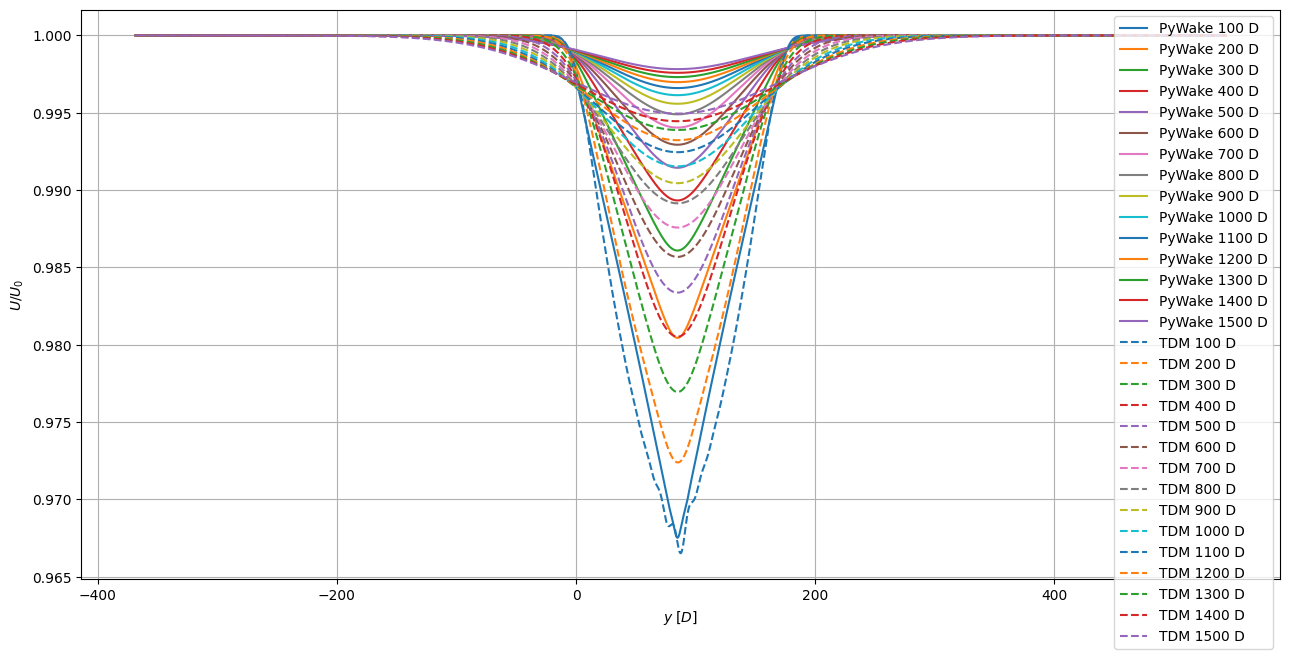

In [ ]:
# --- Setup ---
d_downstream = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]  # Downstream distances [D]
m_downstream = [d * D for d in d_downstream]  # [m]

# Determine max length (y_agreed) from all validation datasets
y_agreed = max(len(df) for df in validation_datasets.values())

# Use the longest file to define w_meas
longest_file = max(validation_datasets, key=lambda f: len(validation_datasets[f]))
w_meas = min(validation_datasets[longest_file].iloc[:, 0].values) * D  # Half-width of measurement area [m]

# Define uniform y_range and y_meas
y_range = np.linspace(w_meas, y_agreed + w_meas, y_agreed)
y_meas = np.tile(y_range[:, np.newaxis], (1, len(m_downstream)))  # Shape: (y_agreed, len(m_downstream))
ws_meas = np.zeros_like(y_meas)

# Dictionaries to store padded TDM profiles and original lengths
padded_tdm = {}
tdm_lengths = {}

# --- Create plot ---
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_xlabel(r'$y \; [D]$')
ax.set_ylabel(r'$ U/U_0 $')
ax.grid(True)

# --- PyWake profiles ---
for i, m in enumerate(m_downstream):
    x_meas = np.full(y_meas.shape[0], max(x) + m)
    ws_meas[:, i] = np.squeeze(
        sim.flow_map(Points(
            x=x_meas,
            y=y_meas[:, i],
            h=turbine.hub_height() * np.ones_like(y_meas[:, i])
        )).WS_eff.values
    )
    ax.plot(y_meas[:, i] / D, ws_meas[:, i] / wsp, label=f'PyWake {d_downstream[i]} D')

# --- TDM (validation) profiles with symmetric padding ---
for i, file in enumerate(validation_files):
    match = re.search(r'(\d+)', file)
    downstream_distance = int(match.group(1)) if match else None

    tdm_data = validation_datasets[file]
    tdm_values = tdm_data.iloc[:, 1].values

    # Store original length BEFORE padding
    if downstream_distance is not None:
        tdm_lengths[downstream_distance] = len(tdm_values)

    # Symmetric padding
    if len(tdm_values) < y_agreed:
        pad_total = y_agreed - len(tdm_values)
        pad_left = pad_total // 2
        pad_right = pad_total - pad_left
        tdm_values = np.pad(tdm_values, (pad_left, pad_right), constant_values=wsp / 10)

    if downstream_distance is not None:
        padded_tdm[downstream_distance] = tdm_values

    # Match to PyWake profile
    if downstream_distance in d_downstream:
        idx = d_downstream.index(downstream_distance)
    else:
        idx = i if i < len(d_downstream) else 0

    color = ax.get_lines()[idx].get_color()
    ax.plot(y_range / D, tdm_values, linestyle='--', color=color, label=f'TDM {downstream_distance} D')

ax.legend()
plt.tight_layout()
plt.show()


# Total wsp deficit integration

In [24]:
rho = 1.225
integrated_m_pywake = {}
integrated_m_tdm = {}

np.trapezoid(ws_meas[:, 0], )

print('------------- INDIVIDUAL MOMENTUM -------------\n')

# PyWake and TDM integration
for i, d in enumerate(d_downstream):
    if d not in padded_tdm or d not in tdm_lengths:
        print(f"[WARNING] Missing data for {d} D")
        continue

    # Get the y-positions from the TDM file
    y_tdm = validation_datasets[validation_files[i]].iloc[:, 0].values * D
    tdm_profile = validation_datasets[validation_files[i]].iloc[:, 1].values * wsp

    # Determine the mask over y_range that falls within TDM bounds
    mask = (y_range >= y_tdm.min()) & (y_range <= y_tdm.max())

    # Apply to PyWake
    pywake_profile = ws_meas[mask, i]
    y_sub = y_range[mask]

    # Interpolate PyWake to match TDM y-points if needed (optional, for higher precision)
    # pywake_interp = np.interp(y_tdm, y_sub, pywake_profile)

    # Integrate both directly over shared y_sub
    tdm_integral = np.trapezoid(tdm_profile, y_tdm)
    pyw_integral = np.trapezoid(pywake_profile, y_sub)

    integrated_m_tdm[d] = rho * tdm_integral**2
    integrated_m_pywake[d] = rho * pyw_integral**2

    print(f"TDM integrated momentum at {d} D: {integrated_m_tdm[d]:.0f} kg*m/s")
    print(f"PyW integrated momentum at {d} D: {integrated_m_pywake[d]:.0f} kg*m/s")

print('\n------------- TOTAL MOMENTUM DEVIATION [%] -------------\n')

for d in d_downstream:
    if d in integrated_m_tdm and d in integrated_m_pywake:
        pyw = integrated_m_pywake[d]
        tdm = integrated_m_tdm[d]
        percent_diff = 100 * (pyw - tdm) / pyw
        print(f"TDM error at {d} D: {percent_diff:.2f}%")

print('\n------------- MOMENTUM DEFICIT DEVIATION [%] -------------\n')

for i, d in enumerate(d_downstream):
    if d not in padded_tdm or d not in tdm_lengths:
        print(f"[WARNING] Missing data for {d} D")
        continue

    # Get the y-positions from the TDM file
    y_tdm = validation_datasets[validation_files[i]].iloc[:, 0].values * D
    tdm_profile = validation_datasets[validation_files[i]].iloc[:, 1].values * wsp

    # Determine the mask over y_range that falls within TDM bounds
    mask = (y_range >= y_tdm.min()) & (y_range <= y_tdm.max())

    # Apply to PyWake
    pywake_profile = ws_meas[mask, i]
    y_sub = y_range[mask]

    # Interpolate PyWake to match TDM y-points if needed (optional, for higher precision)
    # pywake_interp = np.interp(y_tdm, y_sub, pywake_profile)

    # Integrate both directly over shared y_sub
    tdm_integral = np.trapezoid(wsp - tdm_profile, y_tdm)
    pyw_integral = np.trapezoid(wsp - pywake_profile, y_sub)

    integrated_m_tdm[d] = rho * tdm_integral**2
    integrated_m_pywake[d] = rho * pyw_integral**2


for d in d_downstream:
    if d in integrated_m_tdm and d in integrated_m_pywake:
        pyw = integrated_m_pywake[d]
        tdm = integrated_m_tdm[d]
        percent_diff = 100 * (pyw - tdm) / pyw
        print(f"TDM error at {d} D: {percent_diff:.2f}%")

print('\n------------- MAXIMUM VELOCITY DEVIATION [%] -------------\n')



print('\n------------- WAKE WIDTH DEVIATION [%] -------------\n')



------------- INDIVIDUAL MOMENTUM -------------

TDM integrated momentum at 100 D: 52977443278 kg*m/s
PyW integrated momentum at 100 D: 53174078885 kg*m/s
TDM integrated momentum at 200 D: 81924929392 kg*m/s
PyW integrated momentum at 200 D: 82442189465 kg*m/s
TDM integrated momentum at 300 D: 116970836247 kg*m/s
PyW integrated momentum at 300 D: 117668310345 kg*m/s
TDM integrated momentum at 400 D: 158131047499 kg*m/s
PyW integrated momentum at 400 D: 158958971255 kg*m/s
TDM integrated momentum at 500 D: 205411981938 kg*m/s
PyW integrated momentum at 500 D: 206345718038 kg*m/s
TDM integrated momentum at 600 D: 258816463289 kg*m/s
PyW integrated momentum at 600 D: 259841380556 kg*m/s
TDM integrated momentum at 700 D: 318345825594 kg*m/s
PyW integrated momentum at 700 D: 319452187623 kg*m/s
TDM integrated momentum at 800 D: 384000726311 kg*m/s
PyW integrated momentum at 800 D: 385181535312 kg*m/s
TDM integrated momentum at 900 D: 455781492567 kg*m/s
PyW integrated momentum at 900 D: 457

# Measurement lines

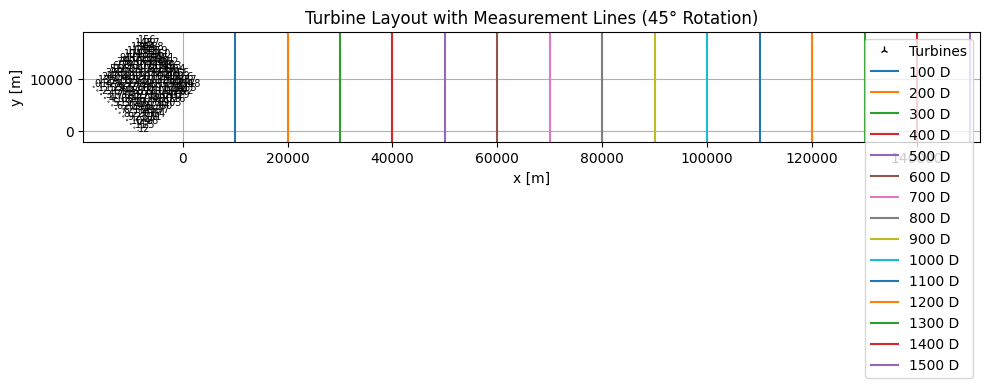

In [11]:
padding = 2000  # Padding for display

fig, ax = plt.subplots(figsize=(10, 6))
turbine.plot(x, y, ax=ax)

# Set plot limits with padding
ax.set_xlim(min(x) - padding, max(x) + max(m_downstream) + padding)
ax.set_ylim(min(y) - padding, max(y) + padding)

# Draw vertical lines at each x_meas (same for all points in a column)
color_map = plt.get_cmap('tab10')
for i, m in enumerate(m_downstream):
    x_line = max(x) + m
    color = color_map(i % 10)
    ax.axvline(x=x_line, color=color, label=f'{d_downstream[i]} D')  # Add label for legend

# Beautify
ax.set_title(f"Turbine Layout with Measurement Lines ({theta_deg}° Rotation)")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_aspect('equal')
ax.grid(True)

# Only show one legend entry per PL
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique.values(), unique.keys())

plt.tight_layout()
plt.show()

# Wake min y-coord.

In [12]:
# Define a threshold for wake calculation (e.g., 95% of free-stream wind speed)
threshold = 0.99999 * wsp

# Calculate and print the lowest y-value of the wake for each downstream distance
for i, d in enumerate(d_downstream):
    wake_indices = np.where(ws_meas[:, i] < threshold)[0]
    if len(wake_indices) > 0:
        lowest_y = y_range[wake_indices[0]]
        print(f"Lowest y-value of the wake at {d} D: {lowest_y:.10f} m")
    else:
        print(f"No wake detected at {d} D")

Lowest y-value of the wake at 100 D: -1951.5301246937 m
Lowest y-value of the wake at 200 D: -2743.5388150027 m
Lowest y-value of the wake at 300 D: -3504.5471651607 m
Lowest y-value of the wake at 400 D: -4251.5553617021 m
Lowest y-value of the wake at 500 D: -4990.5634704626 m
Lowest y-value of the wake at 600 D: -5724.5715243601 m
Lowest y-value of the wake at 700 D: -6455.5795453397 m
Lowest y-value of the wake at 800 D: -7184.5875443741 m
Lowest y-value of the wake at 900 D: -7911.5955214633 m
Lowest y-value of the wake at 1000 D: -8637.6034875799 m
Lowest y-value of the wake at 1100 D: -9361.6114317513 m
Lowest y-value of the wake at 1200 D: -10084.6193649500 m
Lowest y-value of the wake at 1300 D: -10806.6272871761 m
Lowest y-value of the wake at 1400 D: -11526.6351874570 m
Lowest y-value of the wake at 1500 D: -12245.6430767653 m
